In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 탐색

In [3]:
path_day_care_center = '/content/drive/MyDrive/공부/집값예측/day_care_center.csv'
path_park = '/content/drive/MyDrive/공부/집값예측/park.csv'
path_submission = '/content/drive/MyDrive/공부/집값예측/submission.csv'
path_test = '/content/drive/MyDrive/공부/집값예측/test.csv'
path_train = '/content/drive/MyDrive/공부/집값예측/train.csv'

## 1.1. day_care_center

In [4]:
df_day_care_center = pd.read_csv(path_day_care_center)

In [5]:
df_day_care_center[df_day_care_center['day_care_name'] == '가람어린이집']

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1554,서울특별시,종로구,가람어린이집,가정,20,4.0,4.0,0.0,4.0,N,2018-08-13
1785,서울특별시,양천구,가람어린이집,가정,15,4.0,NaN,NaN,4.0,N,2018-08-06
3218,부산광역시,서구,가람어린이집,민간,98,19.0,10.0,1.0,16.0,Y,2018-08-08
4116,서울특별시,강동구,가람어린이집,가정,20,5.0,NaN,NaN,0.0,NaN,2018-08-17
4388,서울특별시,영등포구,가람어린이집,국공립,20,7.0,3.0,0.0,5.0,N,2018-02-28
4880,부산광역시,기장군,가람어린이집,가정,20,7.0,3.0,0.0,4.0,Y,2019-02-21
6585,서울특별시,관악구,가람어린이집,민간,38,9.0,4.0,1.0,9.0,Y,2018-08-01
6857,부산광역시,사하구,가람어린이집,가정,19,7.0,4.0,0.0,4.0,N,2019-01-17


In [6]:
list(df_day_care_center.columns)

['city',
 'gu',
 'day_care_name',
 'day_care_type',
 'day_care_baby_num',
 'teacher_num',
 'nursing_room_num',
 'playground_num',
 'CCTV_num',
 'is_commuting_vehicle',
 'reference_date']

day_care_center
- city : 도시이름
- gu : 시군구
- day care name : 근처 어린이집
- day care type : 어린이집 타입
- day care baby num : 어린이 수
- teacher num : 선생님 수
- nursing room num : 수유실 수
- playground num : 놀이터 수
- cctv num : cctv 수
- is cummuting_veicle : 자동차 통근 여부
- reference date : 데이터 날짜

In [7]:
df_day_care_center.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


## 1.2. park

In [8]:
df_park = pd.read_csv(path_park)

In [9]:
df_park.columns

Index(['city', 'gu', 'dong', 'park_name', 'park_type', 'park_area',
       'park_exercise_facility', 'park_entertainment_facility',
       'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other',
       'park_open_year', 'reference_date'],
      dtype='object')

In [10]:
df_park

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25


## 1.3. train

In [11]:
df_train = pd.read_csv(path_train)

In [12]:
list(df_train.columns)

['transaction_id',
 'apartment_id',
 'city',
 'dong',
 'jibun',
 'apt',
 'addr_kr',
 'exclusive_use_area',
 'year_of_completion',
 'transaction_year_month',
 'transaction_date',
 'floor',
 'transaction_real_price']

- transaction_id : 
- apartment_id
- city : 도시
- dong : 읍면동
- jibun : 지번
- apt : 아파트 이름
- addr_kr : 한국 주소
- exclusive use area : 외부 공간
- year of completion : 완공
- transaction year month : 거래년도, 월
- transction date : 거래 날짜
- floor : 층수
- transaction_real_price : 실거래가 (타겟)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [14]:
df_train.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [15]:
df_train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


## 1.4. submit

In [16]:
df_submission = pd.read_csv(path_submission)

In [17]:
df_submission

,transaction_id,transaction_real_price
0,1145756,0
1,1198704,0
2,1222384,0
3,1179897,0
4,1223091,0
...,...,...
5458,1174640,0
5459,1175575,0
5460,1157024,0
5461,1136863,0


## 1.5.test

In [18]:
df_test = pd.read_csv(path_test)

In [19]:
df_test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


# 2. 테이블 join

In [20]:
df_day_care_center['reference_year'] = df_day_care_center['reference_date'].apply(lambda x : x[:4])
df_day_care_center['is_commuting_vehicle'] = df_day_care_center['is_commuting_vehicle'].apply(lambda x: 1 if x == 'Y' else 0)

In [21]:
df_day_care_center['cnt_care_center'] = 1

In [22]:
group_day_care_center = df_day_care_center[['city', 'gu', 'day_care_baby_num', 'teacher_num', 'playground_num', 'nursing_room_num','CCTV_num','cnt_care_center']].groupby(['city', 'gu']).sum().reset_index()

In [23]:
df_park['cnt_park'] = 1

In [24]:
group_park = df_park[['city', 'gu', 'dong', 'cnt_park', 'park_type', 'park_area']].groupby(['city', 'gu', 'dong']).sum().reset_index()

In [25]:
group_park

,city,gu,dong,cnt_park,park_area
0,부산광역시,강서구,녹산동,1,12211.9
1,부산광역시,강서구,대저1동,1,646.0
2,부산광역시,강서구,명지동,25,348482.8
3,부산광역시,강서구,송정동,2,57560.0
4,부산광역시,강서구,신호동,4,69323.0
...,...,...,...,...,...
239,서울특별시,중구,충무로5가,1,3907.0
240,서울특별시,중구,황학동,1,1087.0
241,서울특별시,중랑구,면목동,2,2801845.8
242,서울특별시,중랑구,묵동,2,1144.7


In [26]:
df_covenience_cnt = pd.merge(group_park,group_day_care_center, how='outer', on=['city', 'gu'])

In [27]:
df_covenience_cnt

,city,gu,dong,cnt_park,park_area,day_care_baby_num,teacher_num,playground_num,nursing_room_num,CCTV_num,cnt_care_center
0,부산광역시,강서구,녹산동,1.0,12211.9,5312.0,982.0,18.0,534.0,790.0,123.0
1,부산광역시,강서구,대저1동,1.0,646.0,5312.0,982.0,18.0,534.0,790.0,123.0
2,부산광역시,강서구,명지동,25.0,348482.8,5312.0,982.0,18.0,534.0,790.0,123.0
3,부산광역시,강서구,송정동,2.0,57560.0,5312.0,982.0,18.0,534.0,790.0,123.0
4,부산광역시,강서구,신호동,4.0,69323.0,5312.0,982.0,18.0,534.0,790.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
240,서울특별시,중구,황학동,1.0,1087.0,4332.0,937.0,23.0,338.0,714.0,68.0
241,서울특별시,중랑구,면목동,2.0,2801845.8,11533.0,2362.0,44.0,1101.0,1808.0,242.0
242,서울특별시,중랑구,묵동,2.0,1144.7,11533.0,2362.0,44.0,1101.0,1808.0,242.0
243,서울특별시,중랑구,신내동,7.0,131094.0,11533.0,2362.0,44.0,1101.0,1808.0,242.0


In [28]:
# train 데이터에서 같은 동이름인데 gu가 다른 것을 알 수 없음 >> 지번주소로 분류해야함
df_covenience_cnt[df_covenience_cnt['dong'] == '삼성동']

,city,gu,dong,cnt_park,park_area,day_care_baby_num,teacher_num,playground_num,nursing_room_num,CCTV_num,cnt_care_center
82,서울특별시,강남구,삼성동,8.0,85654.7,11605.0,0.0,0.0,0.0,0.0,223.0
110,서울특별시,관악구,삼성동,4.0,3690.0,11543.0,2463.0,196.0,1207.0,1912.0,271.0


In [29]:
df_train = pd.merge(df_train, df_covenience_cnt, how='left', on=['city', 'dong'])

In [77]:
len(df_train)

927511

In [30]:
df_train.columns

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price', 'gu', 'cnt_park', 'park_area',
       'day_care_baby_num', 'teacher_num', 'playground_num',
       'nursing_room_num', 'CCTV_num', 'cnt_care_center'],
      dtype='object')

In [31]:
df_train = df_train[['transaction_id', 'apartment_id', 'city', 'gu','dong', 'jibun', 'apt', \
       'addr_kr', 'exclusive_use_area', 'year_of_completion',\
       'transaction_year_month', 'transaction_date', 'floor',\
       'transaction_real_price', 'cnt_park', 'park_area',\
       'day_care_baby_num', 'teacher_num', 'playground_num',\
       'nursing_room_num', 'CCTV_num', 'cnt_care_center']]

In [32]:
# Null값 제거
df_train = df_train.dropna().reset_index()

# 3. 상관분석

In [33]:
df_train.corr()

,index,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,cnt_park,park_area,day_care_baby_num,teacher_num,playground_num,nursing_room_num,CCTV_num,cnt_care_center
index,1.000000,0.999931,-0.052865,0.055143,0.019564,0.196671,0.079222,-0.121015,0.122923,-0.250889,-0.315106,-0.332027,-0.071436,-0.255159,-0.289200,-0.336334
transaction_id,0.999931,1.000000,-0.052609,0.054728,0.019823,0.200789,0.078905,-0.119480,0.121557,-0.248314,-0.314114,-0.330650,-0.069796,-0.252902,-0.288165,-0.334939
apartment_id,-0.052865,-0.052609,1.000000,0.026557,-0.044954,-0.001738,-0.004898,0.039521,-0.037228,0.048085,0.011897,0.023253,0.010375,0.010387,0.049015,0.023877
exclusive_use_area,0.055143,0.054728,0.026557,1.000000,0.190776,0.017136,0.136490,0.542372,0.051080,-0.086032,-0.054074,-0.071708,-0.119670,-0.122581,-0.096828,-0.083875
year_of_completion,0.019564,0.019823,-0.044954,0.190776,1.000000,0.086629,0.261100,0.054511,0.069349,-0.098523,0.001352,0.021978,-0.042873,0.007752,-0.034445,-0.021761
transaction_year_month,0.196671,0.200789,-0.001738,0.017136,0.086629,1.000000,0.007639,0.190063,-0.010083,0.017990,0.072065,0.068718,-0.000094,0.005869,0.037564,0.072442
floor,0.079222,0.078905,-0.004898,0.136490,0.261100,0.007639,1.000000,0.102415,-0.027238,-0.047713,-0.074611,-0.059258,-0.024734,-0.017636,-0.037211,-0.074619
transaction_real_price,-0.121015,-0.119480,0.039521,0.542372,0.054511,0.190063,0.102415,1.000000,0.098854,-0.073793,0.176133,0.038477,-0.217685,-0.259448,-0.034213,0.119430
cnt_park,0.122923,0.121557,-0.037228,0.051080,0.069349,-0.010083,-0.027238,0.098854,1.000000,-0.157241,0.288516,0.183766,-0.329538,-0.240769,-0.228372,0.225854
park_area,-0.250889,-0.248314,0.048085,-0.086032,-0.098523,0.017990,-0.047713,-0.073793,-0.157241,1.000000,0.097914,0.177015,0.255421,0.420667,0.328751,0.253165


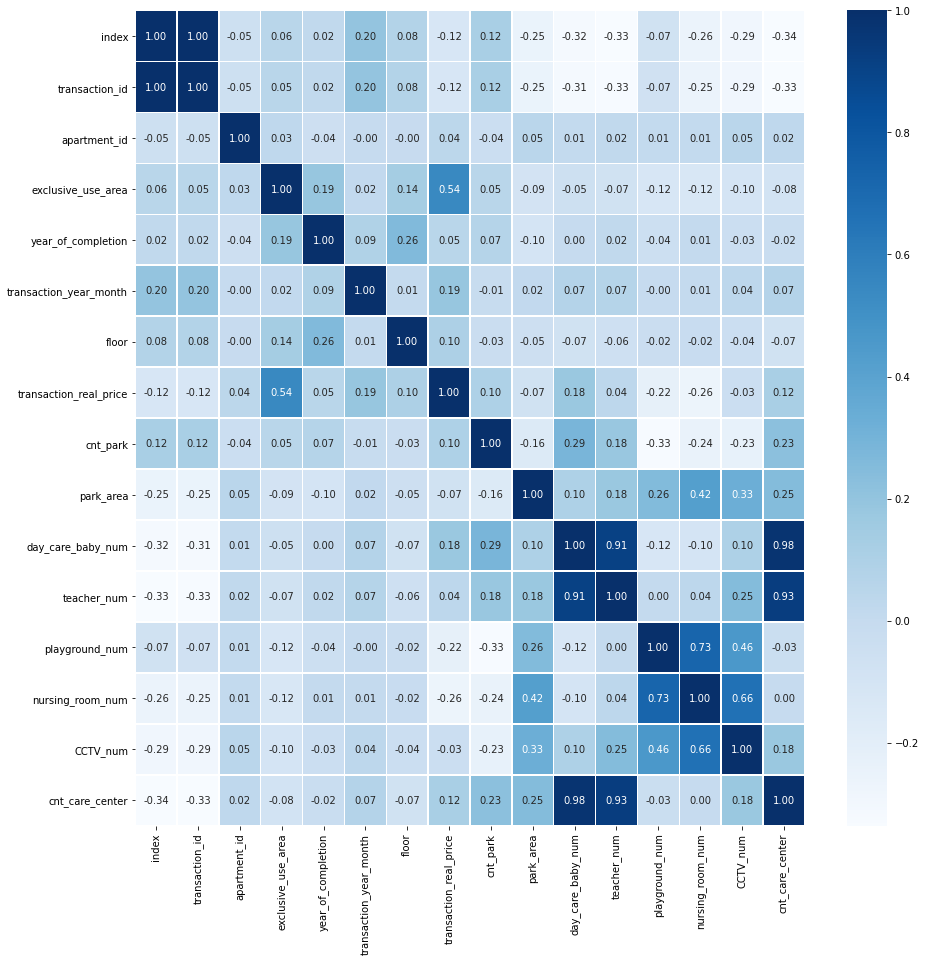

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 4. 모델

In [35]:
target = 'transaction_real_price'
corr = df_train.corr()
corr = pd.DataFrame(corr.loc[target]).sort_values(by=[target])

In [36]:
corr['absolute_corr'] = corr['transaction_real_price'].apply(lambda x: -x if x < 0 else x)

In [37]:
corr.sort_values('absolute_corr')

,transaction_real_price,absolute_corr
CCTV_num,-0.034213,0.034213
teacher_num,0.038477,0.038477
apartment_id,0.039521,0.039521
year_of_completion,0.054511,0.054511
park_area,-0.073793,0.073793
cnt_park,0.098854,0.098854
floor,0.102415,0.102415
cnt_care_center,0.119430,0.119430
transaction_id,-0.119480,0.119480
index,-0.121015,0.121015


In [38]:
good_columns = corr.sort_values('absolute_corr').index[-10:-1]
good_columns

Index(['floor', 'cnt_care_center', 'transaction_id', 'index',
       'day_care_baby_num', 'transaction_year_month', 'playground_num',
       'nursing_room_num', 'exclusive_use_area'],
      dtype='object')

In [39]:
df_train[good_columns]

,floor,cnt_care_center,transaction_id,index,day_care_baby_num,transaction_year_month,playground_num,nursing_room_num,exclusive_use_area
0,1,78.0,11,11,4902.0,200801,63.0,385.0,84.5900
1,2,78.0,12,12,4902.0,200801,63.0,385.0,75.6000
2,5,78.0,38,38,4902.0,200801,63.0,385.0,114.9000
3,21,78.0,39,39,4902.0,200801,63.0,385.0,84.9200
4,4,78.0,40,40,4902.0,200801,63.0,385.0,60.0000
...,...,...,...,...,...,...,...,...,...
927506,7,127.0,1233174,1227177,5371.0,201711,143.0,499.0,59.9934
927507,16,127.0,1233175,1227178,5371.0,201711,143.0,499.0,84.9892
927508,6,127.0,1233176,1227179,5371.0,201711,143.0,499.0,84.9677
927509,26,127.0,1233177,1227180,5371.0,201711,143.0,499.0,59.9934


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [62]:
model = DecisionTreeClassifier(criterion='entropy' , max_depth=5, min_samples_leaf=30 ,max_features=None, random_state=1)

In [42]:
# 속도가 너무 느려서 천개만 사용함
df_train_2 = df_train.loc[:1000]

In [63]:
result = model.fit(df_train_2[good_columns], list(df_train_2['transaction_real_price']))
# fitted.append(result)

In [45]:
# test 할 데이터셋
df_test2 = df_train.loc[1000:2000]

In [64]:
pred = result.predict(df_test2[good_columns])

In [70]:
predict = df_test2[['transaction_real_price']]
predict['pred'] = pred
predict.tail(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,transaction_real_price,pred
1981,80000,65000
1982,35000,12500
1983,40000,12500
1984,32500,12500
1985,60000,52000
1986,36000,12500
1987,25000,12500
1988,40500,33000
1989,54500,52000
1990,56900,52000


In [74]:
rmse = 0
for i, row in  predict.iterrows():
  rmse = rmse + (row['transaction_real_price'] - row['pred'])**2

rmse = rmse / len(predict)
rmse = rmse ** 0.5
print(rmse)

11264.195140924503
